#  Analiza Danych w Pythonie: `pandas`

### 23 października 2021

### `pandas`
Biblioteka `pandas` jest podstawowym narzędziem w ekosystemie Pythona do analizy danych:
 * dostarcza dwa podstawowe typy danych: `Series` (szereg, 1D) i `DataFrame` (ramka danych, 2D);
 * operacje na tych obiektach: obsługa brakujących wartości, łączenie danych;
 * obsługuje dane różnego typu, np. szeregi czasowe;
 * biblioteka bazuje na `numpy` -- bibliotece do obliczeń numerycznych;
 * pozwala też na prostą wizualizację danych;
 * ETL: extract, transform, load.

In [2]:
import pandas as pd

#### __Zadanie 0__: sprawdź, czy masz zainstalowaną bibliotekę `pandas`.

### Szereg (`pd.Series`)

 Reprezentacja danych jednowymiarowych:
  * możemy stworzyć `Series` z listy lub słownika;
  * W przypadku słownika klucze stają się indeksem;
  * dane muszą być jednorodne, inaczej nastąpi automatyczna konwersja.

In [3]:

data = [211819,682758, 737011, 779511, 673790, 673790, 444177, 136791]

s = pd.Series(data)

print(s)

0    211819
1    682758
2    737011
3    779511
4    673790
5    673790
6    444177
7    136791
dtype: int64


In [5]:
members = {'April': 211819,'May': 682758, 'June': 737011, 'July': 779511,
'August': 673790, 'September': 673790, 'October': 444177, 'November': 136791,
}

s = pd.Series(members)

print(s)

April        211819
May          682758
June         737011
July         779511
August       673790
September    673790
October      444177
November     136791
dtype: int64


In [15]:
months = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

data = [211819, 682758, 737011, 779511, 673790, 673790, 444177, 136791]

s = pd.Series(data, index=months, dtype=int, name='Rides')

print(s)

April        211819
May          682758
June         737011
July         779511
August       673790
September    673790
October      444177
November     136791
Name: Rides, dtype: int64


In [161]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

all_data = members + occasionals
all_data


May          830656
June         908505
July         973827
August       880599
September    814282
October      497773
dtype: int64

In [163]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

members /= 1000

members

May          682.758
June         737.011
July         779.511
August       673.790
September    673.790
October      444.177
dtype: float64

#### Tworzenie `pd.Series` ([documentacja](https://pandas.pydata.org/docs/reference/api/pandas.Series.html))
 Parametry:
  * `data`
  * `index`
  * `dtype`
  * `name` 

### Ramka danych (`pd.DataFrame`)
 Reprezentacja danych tabelarycznych:
 * różnorodność tworzenia `DataFrame`;
 * poszczególne kolumny to `pd.Series`;

In [18]:
members = {'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177}

occasionals = {'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596}
df = pd.DataFrame({'members': members, 'occasionals': occasionals})

df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


In [19]:

members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})

df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


In [20]:
data = [(682758, 147898), (737011, 171494), (779511, 194316)]

df = pd.DataFrame(data)

df

,0,1
0,682758,147898
1,737011,171494
2,779511,194316


In [21]:
data = [(682758, 147898), (737011, 171494), (779511, 194316)]
column_names = ['members', 'occasionals']

df = pd.DataFrame(data, columns=column_names)

df

,members,occasionals
0,682758,147898
1,737011,171494
2,779511,194316


In [22]:
data = [(682758, 147898), (737011, 171494), (779511, 194316)]
column_names = ['members', 'occasionals']
index_keys = ['May', 'June', 'July']

df = pd.DataFrame(data, columns=column_names, index=index_keys)

df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316


In [25]:
data = [
    {'members': 682758, 'occasionals': 147898},
    {'members': 737011, 'occasionals': 171494},
    {'members': 779511, 'occasionals': 194316}]

df = pd.DataFrame(data)

df

,members,occasionals
0,682758,147898
1,737011,171494
2,779511,194316


In [30]:
data = {
    'May': {'members': 682758, 'occasionals': 147898},
    'June': {'members': 737011, 'occasionals': 171494},
    'July': {'members': 779511, 'occasionals': 194316}
}

df = pd.DataFrame.from_dict(data, orient='index')

df

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316


### Wczytywanie danych

Biblioteka `pandas` pozwala na wczytanie danych z różnych formatów i źródeł:
 * formaty tekstowe: `csv`, `tsv`, `json`, `HTML`...
 * pliki arkuszy kalkulacyjnych: Excel
 * bazy danych: `sql`
 * inne: `sas` `spss`

 
Pliki nie muszą znajdować się dysku, możemy np. podać link.

Dane są wczytywane bezpośrednio do `pd.DataFrame`.

In [36]:
 df = pd.read_csv('gapminder.csv')
 
 df = pd.read_excel('./bikes.xlsx', engine='openpyxl')

In [37]:
import sqlite3

with sqlite3.connect('astro-timeline.sqlite3') as db:
    df = pd.read_sql("select * from logs", db)

In [62]:
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///astro-timeline.sqlite3', echo=True)
connection  = engine.raw_connection()

df = pd.read_sql_query('select * from logs', con=connection)


In [67]:
url = 'https://raw.githubusercontent.com/tomekd/Python2021/main/homework01/gapminder.csv'
df = pd.read_csv(url)

In [70]:
df = pd.read_csv('./titanic_train.tsv', sep='\t')

In [75]:
df = pd.read_csv('gapminder.csv', index_col='Country')
df.head()

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


In [83]:
df = pd.read_csv(
    'gapminder.csv',
    index_col='Country',
    usecols=['Country', 'gdp', 'population'])

#### Wczytywanie danych
 * `pandas` pozwala na wczytanie danych z najróżniejszych źródeł ([lista](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html));
 * każda funkcja ma listę argumentów, które pozwalają na ustawić parametry (np. [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)).

### Zapis i eksport danych

In [86]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})

df.to_csv('tmp.csv')

In [93]:
df.to_excel('tmp.xlsx')

In [94]:
df.to_json()

'{"members":{"May":682758,"June":737011,"July":779511,"August":673790,"September":673790,"October":444177},"occasionals":{"May":147898,"June":171494,"July":194316,"August":206809,"September":140492,"October":53596}}'

In [90]:
data = df.to_dict()

In [95]:
df.to_clipboard()

#### Podstawowe metody `pd.Series` i `pd.DataFrame`

In [97]:
members = pd.Series({'May': 682758, 'June': 737011, 'July': 779511, 'August': 673790,
'September': 673790, 'October': 444177})

occasionals = pd.Series({'May': 147898, 'June': 171494, 'July': 194316, 'August': 206809,
'September': 140492, 'October': 53596})

df = pd.DataFrame({'members': members, 'occasionals': occasionals})

In [98]:
df.head()

,members,occasionals
May,682758,147898
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492


In [107]:
df.tail()

,members,occasionals
June,737011,171494
July,779511,194316
August,673790,206809
September,673790,140492
October,444177,53596


In [108]:
df.sample(3)

,members,occasionals
July,779511,194316
September,673790,140492
August,673790,206809


In [101]:
df.describe()

,members,occasionals
count,6.000000,6.000000
mean,665172.833333,152434.166667
std,116216.045456,54783.506738
min,444177.000000,53596.000000
25%,673790.000000,142343.500000
50%,678274.000000,159696.000000
75%,723447.750000,188610.500000
max,779511.000000,206809.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, May to October
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   members      6 non-null      int64
 1   occasionals  6 non-null      int64
dtypes: int64(2)
memory usage: 144.0+ bytes


In [104]:
df.columns

Index(['members', 'occasionals'], dtype='object')

In [105]:
df.index

Index(['May', 'June', 'July', 'August', 'September', 'October'], dtype='object')

In [109]:
len(df)

6

In [110]:
df.shape

(6, 2)

#### Operacja arytmetyczne

 * `max`
 * `min`
 * `mean`
 * `count`

In [137]:
df.mean()

female_BMI         2.481789e+01
male_BMI           2.393604e+01
gdp                1.102160e+04
population         1.684709e+07
under5mortality    7.214000e+01
life_expectancy    6.746000e+01
fertility          3.856000e+00
dtype: float64

### Indeksowanie

In [118]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


#### Kolumny

In [119]:
df.gdp
df['gdp']

Country
Afghanistan             1311.0
Albania                 8644.0
Algeria                12314.0
Angola                  7103.0
Antigua and Barbuda    25736.0
Name: gdp, dtype: float64

In [120]:
df[['gdp', 'population']]

,gdp,population
Country,,
Afghanistan,1311.0,26528741.0
Albania,8644.0,2968026.0
Algeria,12314.0,34811059.0
Angola,7103.0,19842251.0
Antigua and Barbuda,25736.0,85350.0


#### `DataFrame.loc()`

* pozwala na odwołanie się do wiersza;
* opcjonalnie możemy podać też nazwę kolumny;
* umożliwia _slicing_, czyli odwoływanie się po zakresie.

In [132]:
df.loc['Angola']

female_BMI         2.348431e+01
male_BMI           2.225083e+01
gdp                7.103000e+03
population         1.984225e+07
under5mortality    1.920000e+02
life_expectancy    5.670000e+01
fertility          6.430000e+00
Name: Angola, dtype: float64

In [133]:
df.loc[['Albania', 'Angola']]

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43


In [141]:
df.loc['Albania', 'gdp']

3.0

In [139]:
df.loc['Albania': 'Angola', 'gdp': 'life_expectancy']

,gdp,population,under5mortality,life_expectancy
Country,,,,
Albania,8644.0,2968026.0,17.9,76.8
Algeria,12314.0,34811059.0,29.5,75.5
Angola,7103.0,19842251.0,192.0,56.7


### Metoda `pd.DataFrame.at`
Pozwala na uzyskanie wartości pojedyńczej komórki.

In [143]:
df.at['Angola', 'gdp']

7103.0

### Dodawanie i modyfikowanie danych

In [156]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)


In [145]:
conts = pd.Series({'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria':' Africa', 'Angola': 'Africa',' Antigua and Barbuda': 'Americas'})

df['continent'] = conts
df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility,continent
Country,,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20,Asia
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76,Europe
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73,Africa
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43,Africa
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16,NaN


In [157]:
df.loc['Argentina'] = {
    'female_BMI': 27.46523,
    'male_BMI': 27.5017,
    'gdp': 14646.0,
    'population': 40381860.0,
    'under5mortality': 15.4,
    'life_expectancy': 75.4,
    'fertility': 2.24
}

In [150]:
df.drop('Albania')

df.drop('Albania', inplace=True)
df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


In [152]:
df.drop('gdp', axis='columns')

,female_BMI,male_BMI,population,under5mortality,life_expectancy,fertility
Country,,,,,,
Afghanistan,21.07402,20.62058,26528741.0,110.4,52.8,6.20
Algeria,26.36841,24.59620,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,85350.0,10.9,75.5,2.16


### Filtrowanie

Są dwa podstawowe sposoby na filtrowanie danych w `pd.DataFrame`:
 * operator `[]` -- najbardziej rozpowszechniony;
 * metoda `query()`.

In [166]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df[(df['Pclass'] == 1) & (df['Sex'] == 'female')].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
32,1,1,Spencer\t Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,Harper\t Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C


#### Operatory

* `&` - koniukcja (i)
* `|` - alternatywa (lub)
* `~` - negacja (nie)
* `()` - jeżeli mamy kilka warunków to warto je uporządkować w nawiasy

In [174]:

df[df['SibSp'] > df['Parch']].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,0,3,Palsson\t Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


#### `pd.DataFrame.query()`

In [177]:
df.query('Pclass == 1').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
7,0,1,McCarthy\t Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
24,1,1,Sloper\t Mr. William Thompson,male,28.0,0,0,113788,35.5000,A6,S


In [191]:
df.query('(Pclass == 1) and (Sex == "female")').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
12,1,1,Bonnell\t Miss. Elizabeth,female,58.0,0,0,113783,26.5500,C103,S
32,1,1,Spencer\t Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C
53,1,1,Harper\t Mrs. Henry Sleeper (Myna Haxtun),female,49.0,1,0,PC 17572,76.7292,D33,C


In [193]:
df.query('SibSp > Parch')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
8,0,3,Palsson\t Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
10,1,2,Nasser\t Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
861,0,3,Hansen\t Mr. Claus Peter,male,41.0,2,0,350026,14.1083,NaN,S
862,0,2,Giles\t Mr. Frederick Edward,male,21.0,1,0,28134,11.5000,NaN,S
864,0,3,"Sage\t Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [198]:
my_age = 31
df.query('Age == @my_age').shape

(17, 11)

#### Wywołanie funkcji na wierszach/kolumnach

In [205]:
df = pd.read_csv('./gapminder.csv', index_col='Country', nrows=5)

df

,female_BMI,male_BMI,gdp,population,under5mortality,life_expectancy,fertility
Country,,,,,,,
Afghanistan,21.07402,20.62058,1311.0,26528741.0,110.4,52.8,6.20
Albania,25.65726,26.44657,8644.0,2968026.0,17.9,76.8,1.76
Algeria,26.36841,24.59620,12314.0,34811059.0,29.5,75.5,2.73
Angola,23.48431,22.25083,7103.0,19842251.0,192.0,56.7,6.43
Antigua and Barbuda,27.50545,25.76602,25736.0,85350.0,10.9,75.5,2.16


In [207]:
def bmi_level(bmi):
    if bmi <= 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    return  'obese'

df['male_BMI'].map(bmi_level)

Country
Afghanistan                normal
Albania                overweight
Algeria                    normal
Angola                     normal
Antigua and Barbuda    overweight
Name: male_BMI, dtype: object

In [211]:
def bmi_level(row_data):
    bmi = row_data['male_BMI']
    if bmi <= 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    return  'obese'
df.apply(bmi_level, axis=1)

Country
Afghanistan                normal
Albania                overweight
Algeria                    normal
Angola                     normal
Antigua and Barbuda    overweight
dtype: object

#### Zliczanie wartości

In [215]:
dane = pd.Series([1, 3, 2, 3, 1, 1, 2, 3, 2, 3])

dane.value_counts()

3    4
1    3
2    3
dtype: int64

<AxesSubplot:>

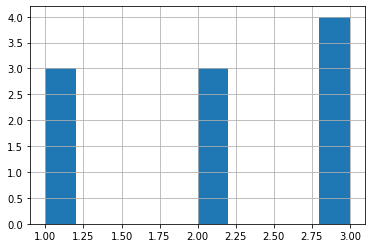

In [219]:
dane.hist()

In [220]:
df.transpose()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda
female_BMI,2.107402e+01,2.565726e+01,2.636841e+01,2.348431e+01,27.50545
male_BMI,2.062058e+01,2.644657e+01,2.459620e+01,2.225083e+01,25.76602
gdp,1.311000e+03,8.644000e+03,1.231400e+04,7.103000e+03,25736.00000
population,2.652874e+07,2.968026e+06,3.481106e+07,1.984225e+07,85350.00000
under5mortality,1.104000e+02,1.790000e+01,2.950000e+01,1.920000e+02,10.90000
life_expectancy,5.280000e+01,7.680000e+01,7.550000e+01,5.670000e+01,75.50000
fertility,6.200000e+00,1.760000e+00,2.730000e+00,6.430000e+00,2.16000


In [4]:
df = pd.read_csv('./titanic_train.tsv', sep='\t', index_col='PassengerId')

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Braund\t Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Cumings\t Mrs. John Bradley (Florence Briggs T...,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen\t Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Futrelle\t Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen\t Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [11]:
df.groupby(['Sex', 'Pclass']).mean()

Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                     
female 1       0.968085  34.611765  0.553191  0.457447  106.125798
       2       0.921053  28.722973  0.486842  0.605263   21.970121
       3       0.500000  21.750000  0.895833  0.798611   16.118810
male   1       0.368852  41.281386  0.311475  0.278689   67.226127
       2       0.157407  30.740707  0.342593  0.222222   19.741782
       3       0.135447  26.507589  0.498559  0.224784   12.661633